In [146]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# One-Hot-Encoding from Intro to Machine Learning book

In [147]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [148]:
# Checking string-encoded categorical data

print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [149]:
# See result of pd.get_dummies

print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [150]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [151]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [152]:
from sklearn.preprocessing import OneHotEncoder

# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


[[0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]


In [153]:
# same thing but with scikit learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

# In-Class Activity 1

In [154]:
# Import the California Housing Data from used in the HOML book, Chapter 2
# Apply one-hot encoding to the ocean_proximity value

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [155]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [156]:
housing = load_housing_data()

In [157]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing['ocean_proximity'].values.reshape(-1,1)

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [158]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# In-Class Activity 2

In [159]:
# Apply binning to the housing_median_age value in the California Housing dataset that we looked at last class
# Plot both the original data and the binned data using matplotlib

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(housing['housing_median_age'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ])]


In [160]:
binned = kb.transform(housing['housing_median_age'].values.reshape(-1, 1))
binned

<20640x10 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

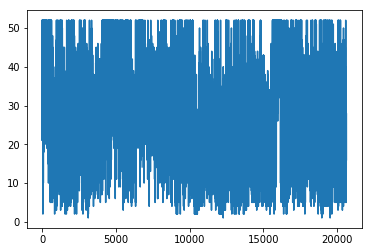

In [161]:
import matplotlib.pyplot as plt
plt.plot(housing['housing_median_age'].values.reshape(-1, 1))
plt.show()

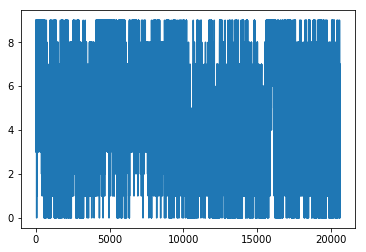

In [162]:
plt.plot(binned.argmax(1))
plt.show()

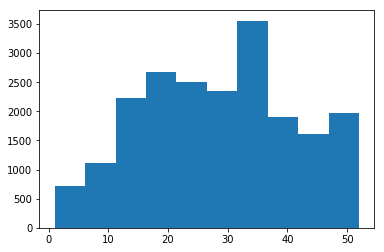

In [163]:
plt.hist(housing['housing_median_age'].values.reshape(-1, 1), bins=10)
plt.show()

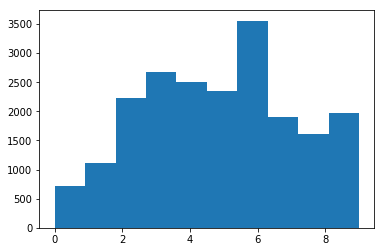

In [164]:
plt.hist(binned.argmax(1))
plt.show()

# In-Class Activity 3

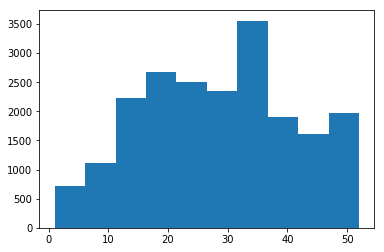

In [165]:
#Apply the following transformations to housing_median_age and median_income in the California Housing dataset
# Squaring (**2)
# Cubing (**3)
# np.log
# np.exp
# Plot histograms and scatter matrices to explore the resultant data

# housing_median_age
plt.hist(housing['housing_median_age'].values.reshape(-1, 1))
plt.show()

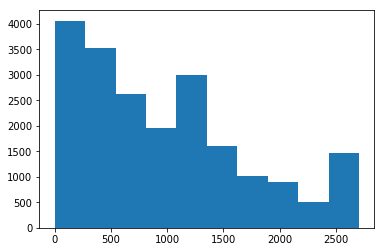

In [166]:
plt.hist(housing['housing_median_age'].values.reshape(-1, 1)**2, bins=10)
plt.show()

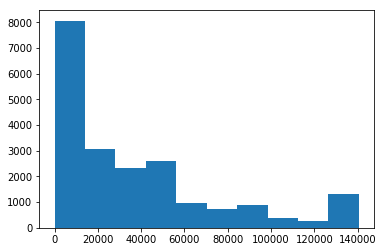

In [167]:
plt.hist(housing['housing_median_age'].values.reshape(-1, 1)**3, bins=10)
plt.show()

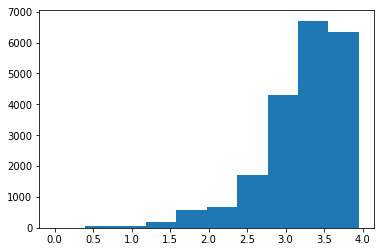

In [168]:
plt.hist(np.log(housing['housing_median_age'].values.reshape(-1, 1)), bins=10)
plt.show()

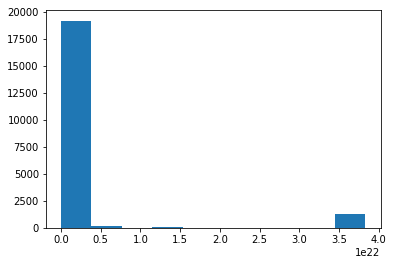

In [169]:
plt.hist(np.exp(housing['housing_median_age'].values.reshape(-1, 1)), bins=10)
plt.show()

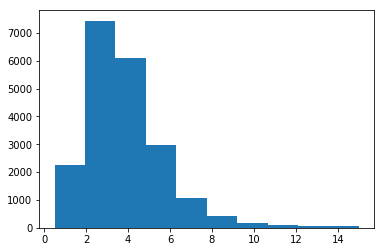

In [170]:
# median_income
plt.hist(housing['median_income'].values.reshape(-1, 1))
plt.show()

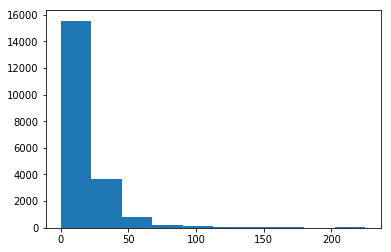

In [171]:
plt.hist(housing['median_income'].values.reshape(-1, 1)**2, bins=10)
plt.show()

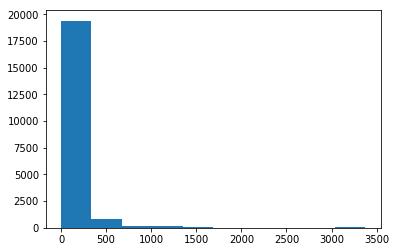

In [172]:
plt.hist(housing['median_income'].values.reshape(-1, 1)**3, bins=10)
plt.show()

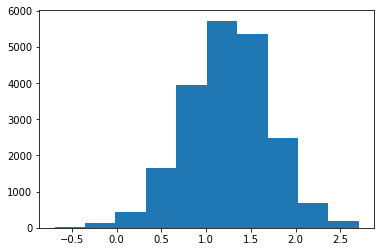

In [173]:
plt.hist(np.log(housing['median_income'].values.reshape(-1, 1)), bins=10)
plt.show()

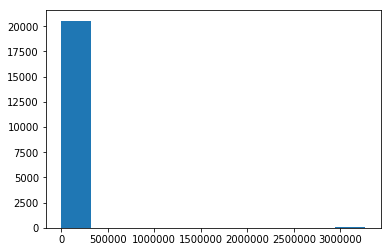

In [174]:
plt.hist(np.exp(housing['median_income'].values.reshape(-1, 1)), bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d465be0>,
      dtype=object)

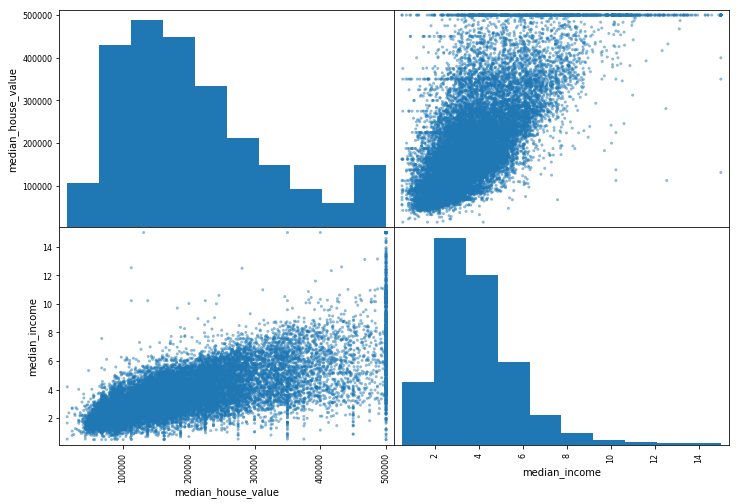

In [175]:
#scatter matrix for the original data for house_median_age and median_income

attributes = ["median_house_value", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d98c5c0>,
      dtype=object)

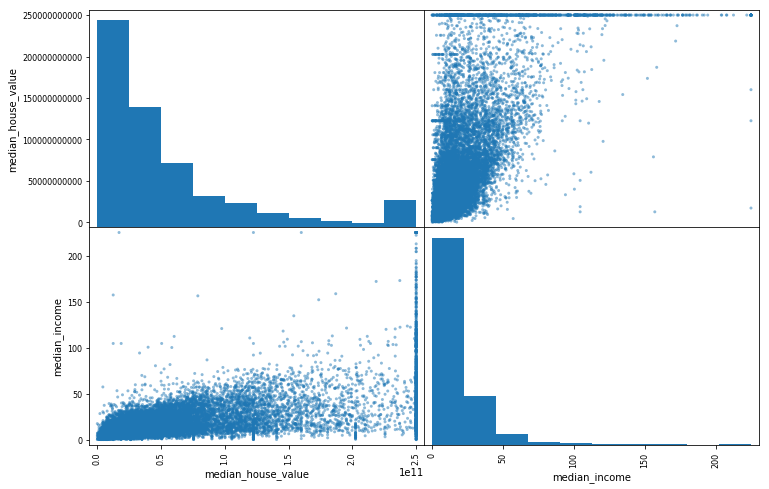

In [176]:
#scatter matrix for the squared data for house_median_age and median_income
scatter_matrix(housing[attributes]**2, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1d4fc7b8>,
      dtype=object)

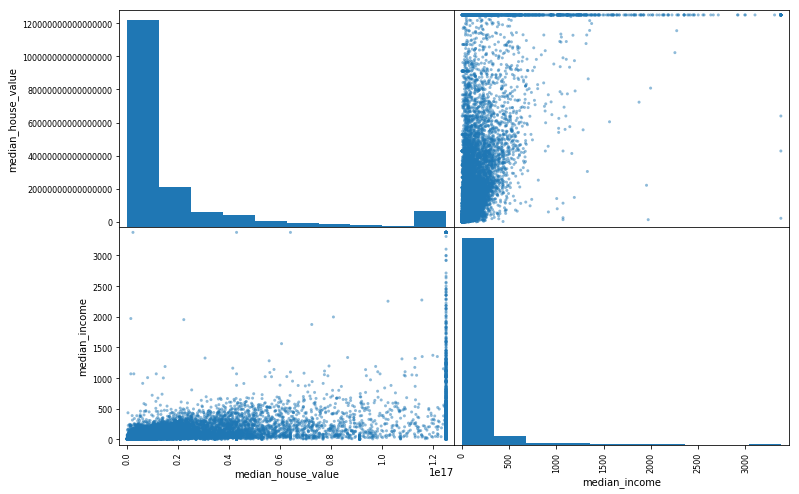

In [177]:
#scatter matrix for the cubed data for house_median_age and median_income
scatter_matrix(housing[attributes]**3, figsize=(12, 8))